# Original MAD Competition

Goal here is to reproduce original MAD Competition results, as generated using the [matlab code](https://github.com/LabForComputationalVision/MAD_Competition) originally provided by Zhou Wang and then modified by the authors.

In [132]:
import imageio
import torch
import scipy.io as sio
import pyrtools as pt
from scipy.io import loadmat
import numpy as np
import matplotlib.pyplot as plt
import plenoptic as po
import pandas as pd
import os.path as op
%matplotlib inline

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## SSIM

Before we discuss MAD Competition, let's look a little at SSIM, since that's the metric used in the original paper, and which we'll be using here. Important to remember that SSIM is a similarity metric, so higher is better, and thus a value of 1 means the images are identical and it's bounded between 0 and 1.

We have tests to show that this matches the output of the MATLAB code, won't show here.

In [27]:
img1 = po.load_images('../data/einstein.pgm')
img2 = po.load_images('../data/curie.pgm')
noisy = po.add_noise(img1, [2,4,8])

We can see that increasing the noise level decreases the SSIM value, but not linearly

In [124]:
po.metric.ssim(img1, noisy)

/home/billbrod/Documents/plenoptic/plenoptic/metric/perceptual_distance.py:96: UserWarning: dynamic_range is 1 but image range falls outside [0, 1] img1: tensor([0.0039, 1.0000]), img2: tensor([-11.0439,  12.5410]). Continuing anyway...
  warnings.warn("dynamic_range is 1 but image range falls outside [0, 1]"


tensor([[0.0028],
        [0.0012],
        [0.0006]])

And that our noise level does match the MSE

In [125]:
po.metric.mse(img1, noisy)

tensor([[2.0000],
        [4.0000],
        [8.0000]])

## MAD Competition

Eventually we'll recreate these results, but not right now. For now, these results can be found in a tarball [on the OSF](https://osf.io/jwcsr/). Update the `results_dir` path to wherever you downloaded and extracted the tarball.

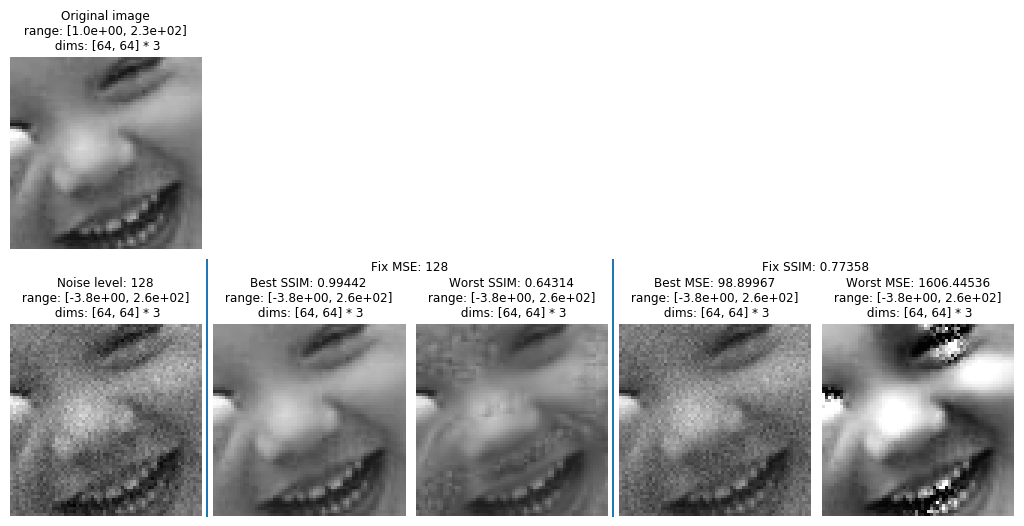

In [133]:
fig, results = po.external.plot_MAD_results('samp6', [128], results_dir=op.expanduser("~/Documents/MAD_Competition/data/MAD_results"), vrange='row1', zoom=3)

Lots of info here

In [134]:
results

{'L128': {'FIX_MSE': 128,
  'FIX_SSIM': 0.7735827815185419,
  'mse_fixmse_maxssim': array([128., 128., 128., 128., 128., 128., 128., 128., 128., 128., 128.,
         128., 128., 128., 128., 128., 128., 128., 128., 128., 128., 128.,
         128., 128., 128., 128., 128., 128., 128., 128., 128., 128., 128.,
         128., 128., 128., 128., 128., 128., 128., 128., 128., 128., 128.,
         128., 128., 128., 128., 128., 128., 128., 128., 128., 128., 128.,
         128., 128., 128., 128., 128., 128., 128., 128., 128., 128., 128.,
         128., 128., 128., 128., 128., 128., 128., 128., 128., 128., 128.,
         128., 128., 128., 128., 128., 128., 128., 128., 128., 128., 128.,
         128., 128., 128., 128., 128., 128., 128., 128., 128., 128., 128.,
         128.]),
  'ssim_fixmse_maxssim': array([0.78662261, 0.80209889, 0.82022919, 0.84059707, 0.86155803,
         0.88088954, 0.89727039, 0.91051589, 0.92100997, 0.92940474,
         0.9362193 , 0.94185083, 0.94659523, 0.95063439, 0.954132